In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

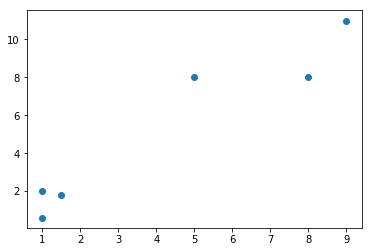

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [6]:
k_means = KMeans(n_clusters = 3)

In [7]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
k_means.labels_

array([1, 1, 0, 0, 1, 2])

In [9]:
k_means.cluster_centers_

array([[ 6.5       ,  8.        ],
       [ 1.16666667,  1.46666667],
       [ 9.        , 11.        ]])

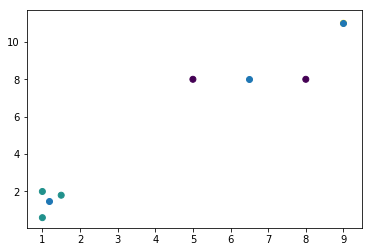

In [10]:
plt.scatter(X[:,0], X[:,1], c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1])
plt.show()

# Starter Code For KMeans

In [18]:
def fit (data, k = 2, max_iter = 100):
    means = []
   # randomly initialize the means\n",
    for i in range(k):
        means.append(data[i])
    for i in range(max_iter):
        # assign the data points to the cluster that they belong to\n
        # create empty clusters        \n",
        clusters = []
        for j in range(k):
            clusters.append([])
        for point in data:
            # find distance to all the mean values\n",
            distances = [((point - m)**2).sum() for m in means]
            # find the min distance\n",
            minDistance = min(distances)
                # find the mean for which we got the minimum distance --> l\n",
            l = distances.index(minDistance) 
                # add this point to cluster l\n",
            clusters[l].append(point)
                
            
         # calculate the new mean values\n",
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j], axis=0)
            if not np.array_equal(means[j], new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means
 
   

# Implementing Fit And Predict Functions

In [22]:
means = fit(X)

In [23]:
def predict(test_data, means):
    predictions = []
    for point in test_data:
    # find distance to all the mean values\n",
        distances = [((point - m)**2).sum() for m in means]
            # find the min distance\n",
        minDistance = min(distances)
                # find the mean for which we got the minimum distance --> l\n",
        l = distances.index(minDistance) 
                # add this point to cluster l\n"
            # add this point to cluster l\n",
        predictions.append(l)
    return predictions

In [24]:
predict(X,means)

[0, 0, 1, 1, 0, 1]